In [1]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import sys
from scipy.interpolate import griddata
from tqdm import tqdm
# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from fio import readin
from visualization import contour_generator

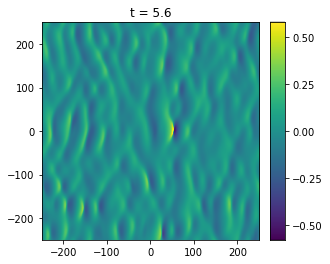

In [76]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global filepath,N,L,kp
    fig,ax = contour_generator()
    filename = filepath + 'eta_matrix_%g' %0
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    image = ax[0].imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577)
    ax[0].cax.colorbar(image)

    # animation function.  This is called sequentially
    def animate(i):
        imgplot = animate_function(i, ax[0])
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim


# Define the function called at every animation time to read in images
def plot_func(i, ax):
    global filepath,N,L,kp
    t = i*0.1
    filename = filepath + 'eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    ax.clear()
    image = ax.imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577)
    ax.set_title('t = %g' %t)
    return image

kp = 2*np.pi/100; N = 2048; L = 500
filepath = '/home/jiarong/research/projects/multilayer/field_L500_P02_RE40000_9_60_coeff01_rand4/surface/'
anim = plot_animation(plot_func, frame_number = 57, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

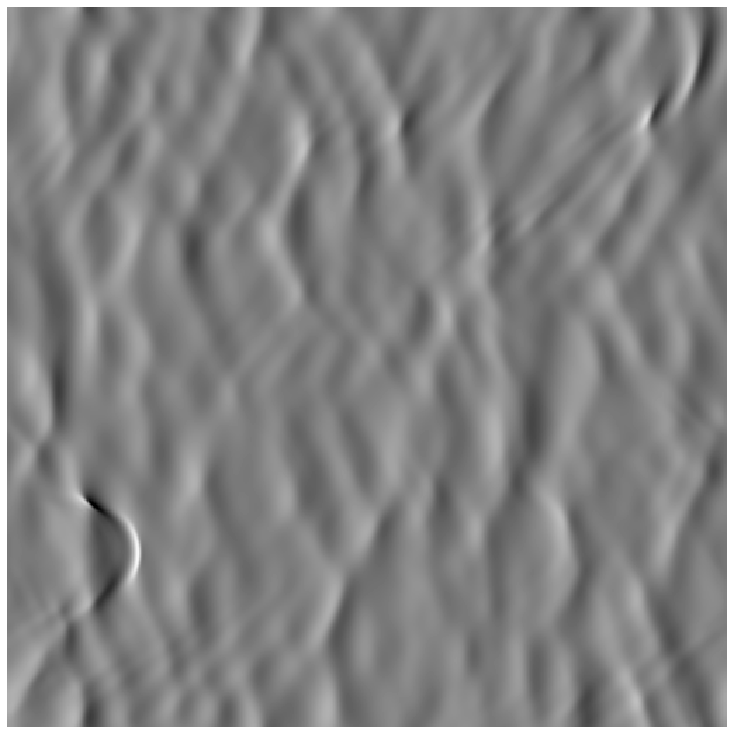

In [82]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global filepath,N,L,kp
#     fig,ax = contour_generator()
    fig = plt.figure(figsize=(10,10)); ax = fig.gca()
    filename = filepath + 'eta_matrix_%g' %0
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    image = ax.imshow(eta_gradx, cmap = 'gray', vmax=0.577, vmin=-0.577)
#     ax[0].cax.colorbar(image)

    # animation function.  This is called sequentially
    def animate(i):
        imgplot = animate_function(i, ax)
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim


# Define the function called at every animation time to read in images
def plot_func(i, ax):
    global filepath,N,L,kp
    t = 35 + i*0.1
    filename = filepath + 'eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
#     eta = np.rot90(eta)
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    ax.clear()
    image = ax.imshow(eta_gradx, cmap = 'gray', vmax=0.577, vmin=-0.577)
    ax.set_axis_off()
    plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
    plt.savefig('wave_series/%g.png' %i, bbox_inches='tight', pad_inches=0, dpi=512)
#     ax.set_axis_on()
#     image = ax.imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577)
#     ax.set_title('t = %g' %t)
    return image

kp = 2*np.pi/10; N = 512; L = 50
filepath = '/home/jiarong/research/projects/multilayer/field_init_test_P0005_RE40000_9_60_rand0/surface/'
anim = plot_animation(plot_func, frame_number = 40, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

In [62]:
a = plt.imread("wave_series/10.png")
a

array([[[0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        ...,
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ]],

       [[0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        ...,
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ]],

       [[0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        ...,
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.5019608, 1.       ],
        [0.5019608, 0.5019608, 0.501960

In [ ]:
filepath = '/home/jiarong/research/projects/multilayer/testing/L500/surface/'
filename = filepath + 'eta_matrix_%g' %50
L=500; N = 256
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
eta_gradx = np.gradient(eta, axis=0)/(L/N)
eta_gradx = np.rot90(eta_gradx)
fig,ax = contour_generator()
image = ax[0].imshow(eta_gradx, vmax=0.577, vmin=-0.577)
ax[0].cax.colorbar(image)

In [9]:
# Some helper function for crest extraction
def field_fromfile(t):
    # Global input horizontal and vertical resolution, field size L, directory
    global N,nl,L,common_path 
    pfile = common_path + 'surface/eta_matrix_%g' %t
    eta = np.fromfile(pfile, dtype=np.float32)
    eta = eta.reshape(N+1,N+1)
    eta = eta[1:,1:]
    # Wave height
    eta = np.rot90(eta)
    # Slope in x direction
    eta_gradx = np.gradient(eta, axis=1)/(L/N)
    # Slope in y direction?
#     eta_grady = np.gradient(eta, axis=1)/(L/N)
#     eta_grady = np.rot90(eta_grady)
#     eta_grad = (eta_gradx**2+eta_grady**2)**0.5
    return eta,eta_gradx
# Example
N = 512; nl = 60; L = 50
common_path = '/home/jiarong/research/projects/multilayer/' + \
                'field_init_test_P0005_RE40000_9_60_rand4/' 
eta, eta_gradx = field_fromfile(40.1)

### Ridge detection
process_field: A function that takes in 2D array eta_gradx and return a labeled binary field including a series of intermediate results. </br>
prop_select: A function that returns the property of each labeled region. </br>
visual_process: A function that visualizes each filtering process involved. Only for testing purposes. 

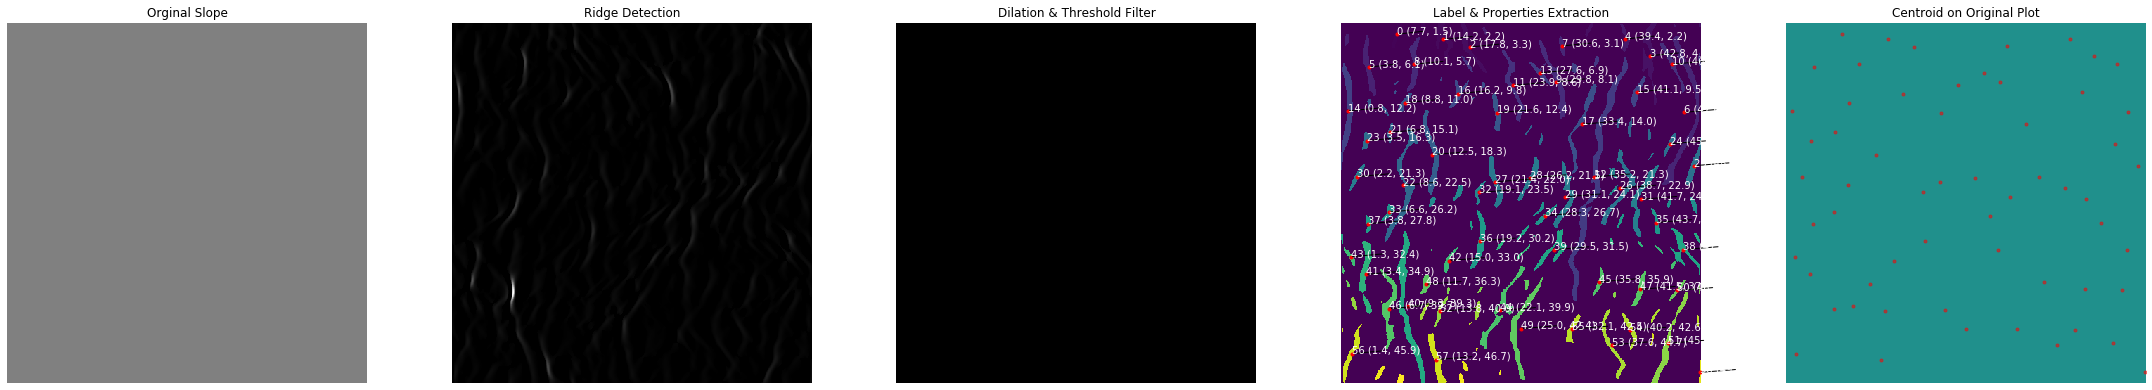

In [184]:
# Processing routine
from skimage.filters import meijering, threshold_isodata
from skimage.morphology import dilation, closing, disk, rectangle
from skimage.measure import label, regionprops

def process_field(raw_figure, hard_thres=False):
    # sigmas=range(1, 10, 2), alpha 
    ridge = meijering(raw_figure, sigmas=1, black_ridges=True)
    dilated = dilation(ridge, rectangle(10,2))
    closed = closing(ridge, rectangle(10,2))
    # Have the option of choosing dilated or ridge detected
    thresh = threshold_isodata(ridge)
    binary = ridge > thresh
    binary_label = label(binary, connectivity=2)
    return ridge, dilated, closing, binary, binary_label

def process_field_hardthres(raw_figure):
    hard = hard_threshold(raw_figure, 0.3)
    binary = hard < 0 
    binary_label = label(binary, connectivity=2)
    return binary, binary_label

def prop_select(binary_label, length_threshold=40):
    region_props = regionprops(binary_label)
    selected = []
    for (i,prop) in enumerate(region_props):
        if prop.perimeter > length_threshold:
            selected.append(prop)
    return selected
            
def visual_process(ridge, dilated, closing, binary, binary_label, selected):
    global pixel_size
    fig, axes = plt.subplots(1, 5, figsize=(30,10))
    for i in range(0,5):
        axes[i].set_axis_off()
    axes[0].imshow(eta_gradx, cmap = 'gray', vmax=0.577, vmin=-0.577); axes[0].set_title('Orginal Slope')
    axes[1].imshow(ridge, cmap = 'gray'); axes[1].set_title('Ridge Detection')
    axes[2].imshow(binary, cmap = 'gray'); axes[2].set_title('Dilation & Threshold Filter')
    axes[3].imshow(binary_label); axes[3].set_title('Label & Properties Extraction')
    axes[4].imshow(eta_gradx, vmax=0.577, vmin=-0.577); axes[4].set_title('Centroid on Original Plot')
    for (i,prop) in enumerate(selected):
        axes[3].plot(prop.centroid[1], prop.centroid[0], '.', color='r')
        axes[3].annotate('%g (%.1f, %.1f)' %(i, prop.centroid[1]*pixel_size, prop.centroid[0]*pixel_size), xy=(prop.centroid[1], prop.centroid[0]), 
                         xytext=(prop.centroid[1], prop.centroid[0]),
                         arrowprops=dict(arrowstyle='-'), color='w')
        axes[4].plot(prop.centroid[1], prop.centroid[0], '.', color='r', alpha = 0.5)
    plt.tight_layout()

# Example
pixel_size = 50/512
# ridge, dilated, closing, binary, binary_label = process_field(eta_gradx, hard_thres=True)
visual_process(ridge, dilated, closing, binary, binary_label, selected)   
binary, binary_labeled = process_field_hardthres(eta_gradx)
selected = prop_select(binary_label, length_threshold=60)

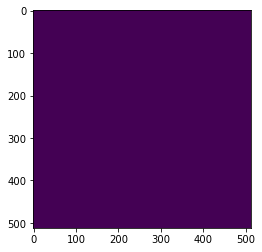

In [186]:
plt.imshow(binary)

In [ ]:
# Supplementary demonstration
from skimage.filters import meijering, sato, frangi, hessian
cmap = plt.cm.gray

def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image
kwargs = {'sigmas': [5], 'mode': 'reflect'}
fig, axes = plt.subplots(2, 5, figsize=(12,5))

image = eta_gradx
result_ensemble = []
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        result_ensemble.append(result)
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')
        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
plt.tight_layout()
plt.show()

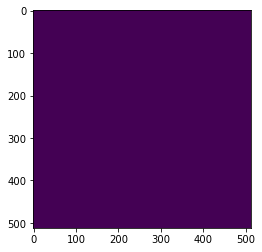

In [29]:
# If to set a hard threshold
# One threshold
def hard_threshold(image, thres):
    for i in range(0,512):
        for j in range(0,512):
            if image[i,j] > thres:
                image[i,j] = image[i,j]
            elif image[i,j] < -thres:
                image[i,j] = image[i,j]
            else:
                image[i,j] = 0
    return image
hard = hard_threshold(eta_gradx, 0.3)
plt.imshow(hard, vmax=0.577, vmin=-0.577);
import cv2
img_binary = cv2.threshold(-hard, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_binary)

### Crosslink and Streamline 
crosslink: A function that takes in two consecutive marked region ensemble (regions) and compute the averaged length and speed (default dt=0.1) </br>
whole_process: A function that stramlines the whole analysis process

In [158]:
# Requires Baptiste's toolkit
from toolkit.image.process import regionprops_to_dataframe
MEASURES = [
        'centroid',
        'perimeter',
        ]
def crosslink(regions1,regions2,limit=6,dt=0.1):
    global pixel_size
    column_names = ['perimeter','centroid_row','centroid_col','perimeter_pre','centroid_row_pre','centroid_col_pre',
                   'speed','length']
    fronts_common = pd.DataFrame(columns = column_names)
    regions1.reset_index(drop=True,inplace=True)
    regions2.reset_index(drop=True,inplace=True)
    regions2['exitinboth'] = pd.Series([False]*len(regions2.perimeter))
    regions1['exitinboth'] = pd.Series([False]*len(regions1.perimeter))
    count = 0
    for i in regions2.index:
        for j in regions1.index:
            if abs(regions2.at[i,'centroid_row']-regions1.at[j,'centroid_row']) \
                + abs(regions2.at[i,'centroid_col']-regions1.at[j,'centroid_col']) < limit:
                fronts_common.loc[count] = 0 # enlargement with loc
                # Copy the perimeter and centroid position of two fronts in both frame that are close enough
                fronts_common.iloc[count][['perimeter','centroid_row','centroid_col']] = \
                    regions2.iloc[i][['perimeter','centroid_row','centroid_col']].copy()
                fronts_common.iloc[count][['perimeter_pre','centroid_row_pre','centroid_col_pre']] = \
                    regions1.iloc[j][['perimeter','centroid_row','centroid_col']].copy()
                count = count + 1
                break 
    fronts_common = fronts_common*pixel_size
    # Compute speed and length, this can be done in a batched way but perimeter and centroid can't 
    # because we need to ensure the correct corresponding relation
    fronts_common['speed'] = (((fronts_common.centroid_row-fronts_common.centroid_row_pre)/dt)**2+\
                            ((fronts_common.centroid_col-fronts_common.centroid_col_pre)/dt)**2)**0.5
    fronts_common['length'] = (fronts_common.perimeter+fronts_common.perimeter_pre)/4
    return regions1, regions2, fronts_common

def whole_process(t, visual=True, len_thres=40):
    # Optional visualization
    global L0
    if visual == True:
        fig, axes = plt.subplots(1, 2, figsize=(10,10))
    eta, eta_gradx = field_fromfile(t)
    ridge, dilated, closing, binary, binary_label = process_field(eta_gradx)
    selected = prop_select(binary_label,len_thres)
    fronts = regionprops_to_dataframe(selected, keys=MEASURES)
    if visual == True:
        axes[0].imshow(eta_gradx, extent=[0,L0,0,L0], vmax=0.577, vmin=-0.577)
    eta, eta_gradx = field_fromfile(t+0.1)
    ridge, dilated, closing, binary, binary_label = process_field(eta_gradx)
    selected_next = prop_select(binary_label,len_thres)
    fronts_next = regionprops_to_dataframe(selected_next, keys=MEASURES)
    fronts, fronts_next, fronts_common = crosslink(fronts,fronts_next)
    if visual == True:
        axes[1].imshow(eta_gradx, extent=[0,L0,0,L0], vmax=0.577, vmin=-0.577)    
        for i,row in fronts_common.iterrows():
            axes[1].plot(row.centroid_col, L0-row.centroid_row, '.', color='r')
            axes[1].text(row.centroid_col, L0-row.centroid_row, 
                    '%g (%.1f, %.1f)' %(i, row.centroid_col, L0-row.centroid_row), color='w')         
            axes[0].plot(row.centroid_col_pre, L0-row.centroid_row_pre, '.', color='r')
            axes[0].text(row.centroid_col_pre, L0-row.centroid_row_pre, 
                    '%g (%.1f, %.1f)' %(i, row.centroid_col_pre, L0-row.centroid_row_pre), color='w')         
        axes[0].set_title('t = %g' %t)
        axes[1].set_title('t = %g' %(t+0.1))
        fig.tight_layout()
    return fronts, fronts_next, fronts_common

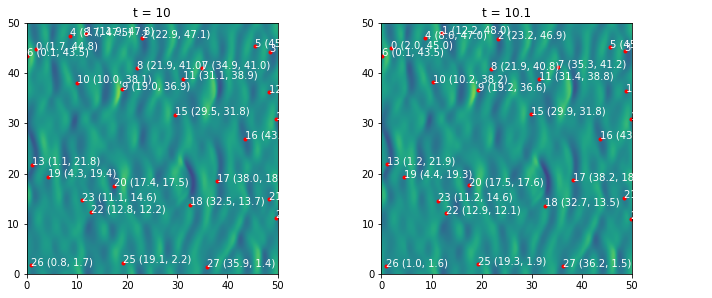

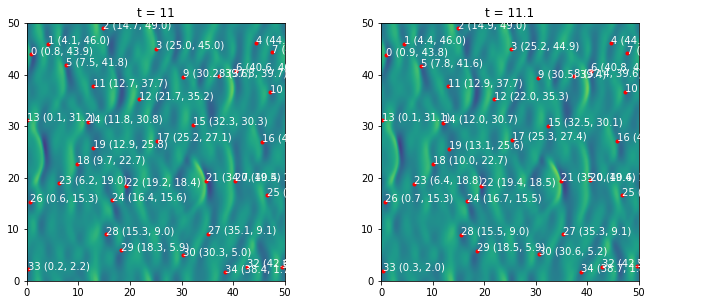

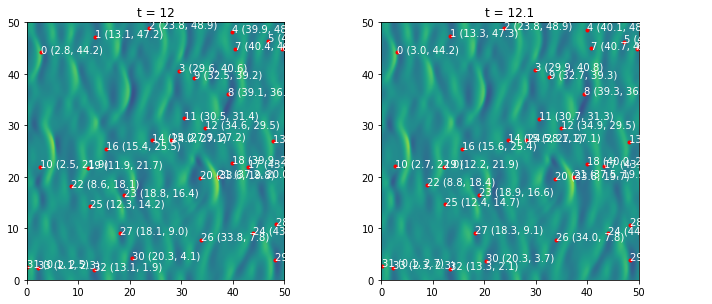

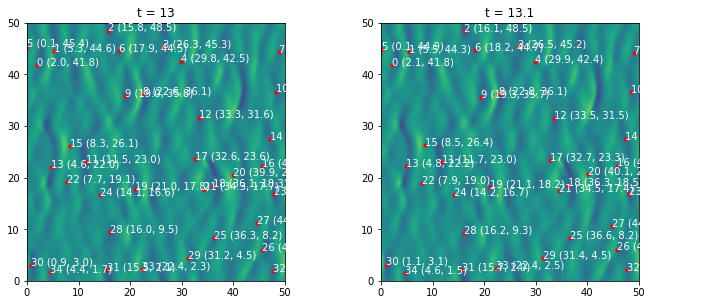

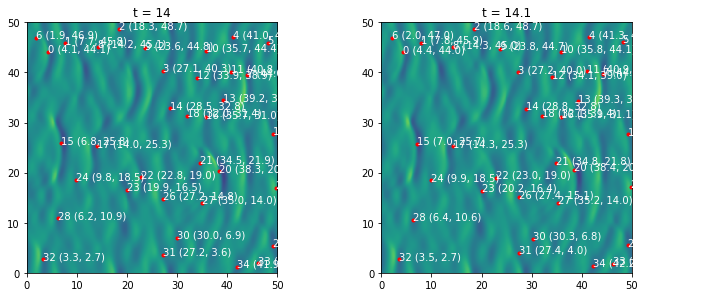

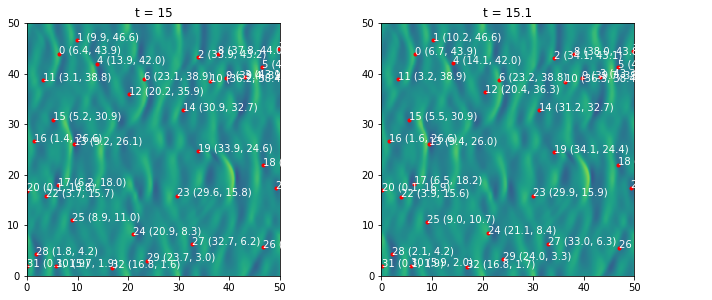

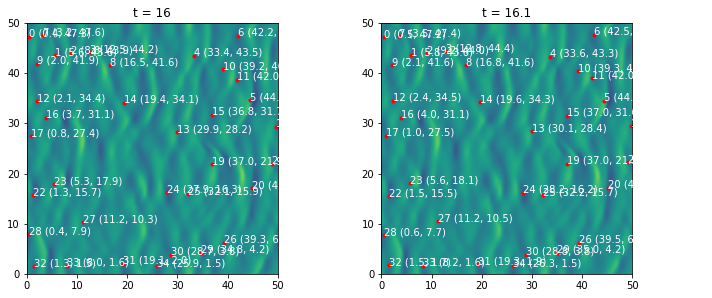

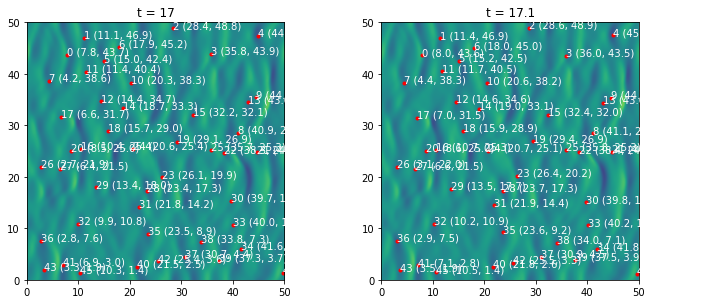

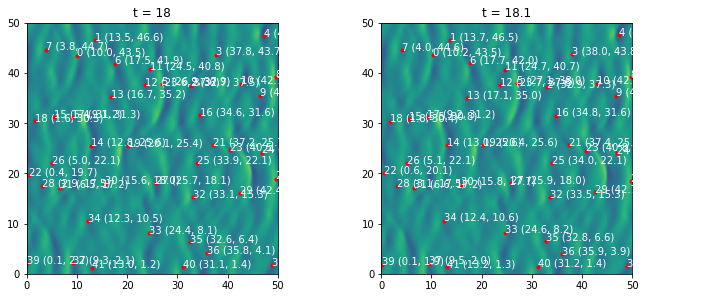

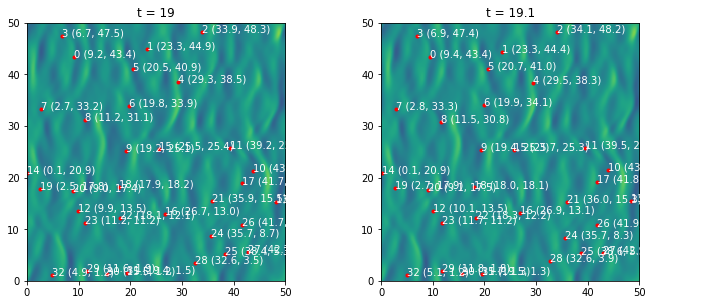

In [159]:
# Crest statistics
common_path = '/home/jiarong/research/projects/multilayer/' + \
                'field_init_test_P0005_RE40000_9_60_rand4/' 
L0 = 50; pixel_size = 50/512
fronts, fronts_next, fronts_common = whole_process(10, len_thres=60)
fronts_common.reset_index()
for t in range (11, 20):
    fronts, fronts_next, fronts_common = whole_process(t,len_thres=60)

In [ ]:
fronts, fronts_next, fronts_common = whole_process(10,len_thres=60)
speed_ensemble = np.array(fronts_common.speed)
length_ensemble = np.array(fronts_common.length)
for t in range (11, 39):
    fronts, fronts_next, fronts_common = whole_process(t,len_thres=60)
    speed_ensemble = np.append(speed_ensemble, fronts_common.speed)
    length_ensemble = np.append(length_ensemble, fronts_common.length)

In [130]:
fronts, fronts_next, fronts_common = whole_process(9,len_thres=60, visual=False)
speed_ensemble = np.array(fronts_common.speed)
length_ensemble = np.array(fronts_common.length)
for i in range (0,5):
    common_path = '/home/jiarong/research/projects/multilayer/' + \
                'field_init_test_P0010_RE40000_9_60_rand%g/' %i
    for t in range (10, 39):
        fronts, fronts_next, fronts_common = whole_process(t,len_thres=60,visual=False)
        speed_ensemble = np.append(speed_ensemble, fronts_common.speed)
        length_ensemble = np.append(length_ensemble, fronts_common.length)

Text(0, 0.5, 'crest length')

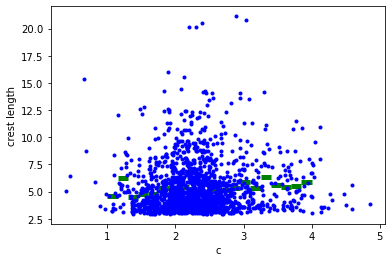

In [141]:
plt.plot(speed_ensemble, length_ensemble, 'b.', label='raw data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
           label='binned statistic of data')
plt.xlabel('c'); plt.ylabel('crest length')

Text(0, 0.5, '$\\Lambda(c)$')

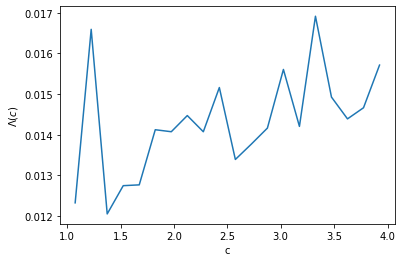

In [143]:
speed_ensemble = speed_ensemble.astype(float)
length_ensemble = length_ensemble.astype(float)
from scipy import stats
binarray = np.linspace(1,4,21)
bin_means, bin_edges, binnumber = stats.binned_statistic(speed_ensemble, length_ensemble, 
                                                         statistic='mean', bins=binarray)
plt.figure()
# plt.plot(speed_ensemble, length_ensemble, 'b.', label='raw data')
# plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
#            label='binned statistic of data')
midpoint = (bin_edges[:-1]+bin_edges[1:])/2
plt.plot(midpoint, bin_means/(bin_edges[1]-bin_edges[0])/50**2)
plt.xlabel('c'); plt.ylabel(r'$\Lambda(c)$')
# plt.yscale('log'); plt.xscale('log')
# plt.legend()

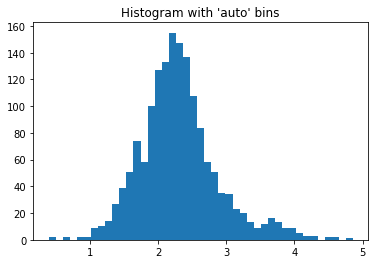

In [134]:
_ = plt.hist(speed_ensemble, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()